In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor

from tqdm import tqdm

import matplotlib.pyplot as plt

In [3]:
dataset_train = FashionMNIST(root="../datasets", train=True, download=False, transform=ToTensor())
dataset_test = FashionMNIST(root="../datasets", train=False, download=False, transform=ToTensor())

In [4]:
BS = 32
dataloader_train = DataLoader(dataset_train, batch_size=BS, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=BS, shuffle=True)

In [5]:
class NiN_Block(nn.Module):
    def __init__(self, inc, outc, ks, stride, padding):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Conv2d(in_channels=inc, out_channels=outc, kernel_size=ks, stride=stride, padding=padding),
            nn.ReLU(),
            nn.Conv2d(in_channels=outc, out_channels=outc, kernel_size=1, stride=1, padding=0),
            nn.ReLU(),            
            nn.Conv2d(in_channels=outc, out_channels=outc, kernel_size=1, stride=1, padding=0),
            nn.ReLU()        
        )
    def forward(self, x):
        return self.layer_stack(x)

class NiN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_stack = nn.Sequential(
            NiN_Block(1, 24, 3, 1, 1),
            nn.MaxPool2d(kernel_size=2, stride=2), # 14x14
            NiN_Block(24, 10, 3, 1, 1),
            nn.MaxPool2d(kernel_size=2, stride=2), #7x7         
            nn.AdaptiveAvgPool2d((1,1)),
            nn.Flatten(),   
            #nn.Softmax(dim=1)
        )   
    def forward(self, x):
        return self.layer_stack(x)

In [6]:
device = torch.device("cuda")

In [7]:
model = NiN()
model = model.to(device)
model

NiN(
  (layer_stack): Sequential(
    (0): NiN_Block(
      (layer_stack): Sequential(
        (0): Conv2d(1, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): Conv2d(24, 24, kernel_size=(1, 1), stride=(1, 1))
        (3): ReLU()
        (4): Conv2d(24, 24, kernel_size=(1, 1), stride=(1, 1))
        (5): ReLU()
      )
    )
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): NiN_Block(
      (layer_stack): Sequential(
        (0): Conv2d(24, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): Conv2d(10, 10, kernel_size=(1, 1), stride=(1, 1))
        (3): ReLU()
        (4): Conv2d(10, 10, kernel_size=(1, 1), stride=(1, 1))
        (5): ReLU()
      )
    )
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): AdaptiveAvgPool2d(output_size=(1, 1))
    (5): Flatten(start_dim=1, end_dim=-1)
  )
)

torch.Size([2, 10])

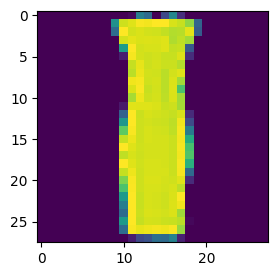

In [8]:
from random import randint

i = randint(0, 60_000)

sample = dataset_train.data[i:i+2].type(torch.float).to(device).reshape(2,1,28,28)

out = model(sample)

plt.figure(figsize=(3,3))
plt.imshow(dataset_train.data[i])
out.shape

  0%|                                                                                                                             | 0/5 [00:00<?, ?it/s]

Loss: 0.07286529242992401 Acc: 0.0625
Loss: 0.07196486741304398 Acc: 0.0625
Loss: 0.07206109911203384 Acc: 0.0625
Loss: 0.0718126967549324 Acc: 0.21875
Loss: 0.07181480526924133 Acc: 0.1875
Loss: 0.07191863656044006 Acc: 0.125
Loss: 0.07205621898174286 Acc: 0.0625
Loss: 0.07229703664779663 Acc: 0.03125
Loss: 0.07141434401273727 Acc: 0.1875
Loss: 0.07158732414245605 Acc: 0.125
Loss: 0.06977003812789917 Acc: 0.1875
Loss: 0.06963609904050827 Acc: 0.15625
Loss: 0.06784876435995102 Acc: 0.21875


 20%|███████████████████████▍                                                                                             | 1/5 [00:07<00:30,  7.75s/it]

Loss: 0.07002530992031097 Acc: 0.15625
Loss: 0.06631192564964294 Acc: 0.25
Loss: 0.0669894590973854 Acc: 0.28125
Loss: 0.06540613621473312 Acc: 0.1875
Loss: 0.05880223214626312 Acc: 0.25
Loss: 0.055329736322164536 Acc: 0.34375
Loss: 0.060079727321863174 Acc: 0.28125
Loss: 0.05567971616983414 Acc: 0.25
Loss: 0.04820801317691803 Acc: 0.4375
Loss: 0.03975559026002884 Acc: 0.46875
Loss: 0.047699183225631714 Acc: 0.5
Loss: 0.04801767319440842 Acc: 0.46875
Loss: 0.040829721838235855 Acc: 0.5


 40%|██████████████████████████████████████████████▊                                                                      | 2/5 [00:15<00:23,  7.67s/it]

Loss: 0.04053642973303795 Acc: 0.59375
Loss: 0.03449397161602974 Acc: 0.625
Loss: 0.03185700252652168 Acc: 0.5625
Loss: 0.03320952132344246 Acc: 0.625
Loss: 0.02498280256986618 Acc: 0.71875
Loss: 0.033118683844804764 Acc: 0.71875
Loss: 0.03843515366315842 Acc: 0.5
Loss: 0.03109157644212246 Acc: 0.53125
Loss: 0.018547028303146362 Acc: 0.875
Loss: 0.028740838170051575 Acc: 0.6875
Loss: 0.043548692017793655 Acc: 0.5
Loss: 0.02862962894141674 Acc: 0.65625
Loss: 0.02040722593665123 Acc: 0.75


 60%|██████████████████████████████████████████████████████████████████████▏                                              | 3/5 [00:22<00:15,  7.65s/it]

Loss: 0.02125200442969799 Acc: 0.71875
Loss: 0.02532707341015339 Acc: 0.65625
Loss: 0.030704190954566002 Acc: 0.53125
Loss: 0.021912848576903343 Acc: 0.8125
Loss: 0.027142897248268127 Acc: 0.65625
Loss: 0.027201499789953232 Acc: 0.625
Loss: 0.026993511244654655 Acc: 0.75
Loss: 0.02934824675321579 Acc: 0.75
Loss: 0.020169947296380997 Acc: 0.78125
Loss: 0.02503875084221363 Acc: 0.75
Loss: 0.025283360853791237 Acc: 0.78125
Loss: 0.030100520700216293 Acc: 0.625
Loss: 0.027682924643158913 Acc: 0.625


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 4/5 [00:30<00:07,  7.64s/it]

Loss: 0.02237287163734436 Acc: 0.78125
Loss: 0.017762405797839165 Acc: 0.6875
Loss: 0.02010350301861763 Acc: 0.71875
Loss: 0.012293494306504726 Acc: 0.84375
Loss: 0.024296347051858902 Acc: 0.6875
Loss: 0.024441346526145935 Acc: 0.71875
Loss: 0.01731986738741398 Acc: 0.8125
Loss: 0.024571605026721954 Acc: 0.6875
Loss: 0.027806393802165985 Acc: 0.71875
Loss: 0.028761377558112144 Acc: 0.625
Loss: 0.026795867830514908 Acc: 0.78125
Loss: 0.017231596633791924 Acc: 0.8125
Loss: 0.018196819350123405 Acc: 0.8125


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:38<00:00,  7.64s/it]


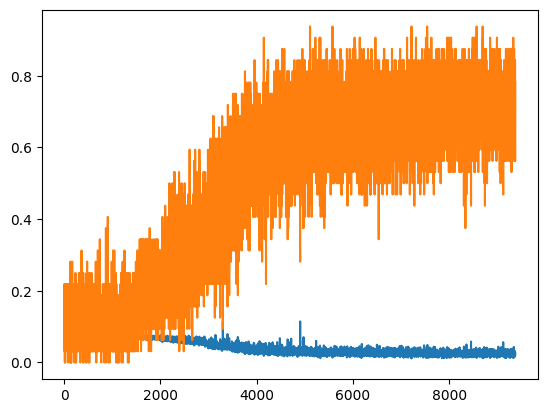

In [9]:
model.train()

N_EPOCHS = 5

B_EPOCHS = 60_000/BS

loss_fn = nn.CrossEntropyLoss()

optim = torch.optim.SGD(params=model.parameters(), lr=0.1)

losses = []
accs = []

for e in tqdm(range(N_EPOCHS)):
    
    for b, (x, y) in enumerate(dataloader_train):
        
        x = x.to(device)
        y = y.to(device)
        
        optim.zero_grad()
        out = model(x)
    
        acc = (out.detach().cpu().argmax(dim=1,)==y.detach().cpu()).sum().item()/BS
        accs.append(acc)
        
        loss = loss_fn(out, y)
        losses.append(loss.item()/BS)
        
        if b % 150 == 0: print("Loss:", loss.item()/BS, "Acc:", acc)
        loss.backward()
        
        optim.step()
        
plt.plot(losses)
plt.plot(accs)

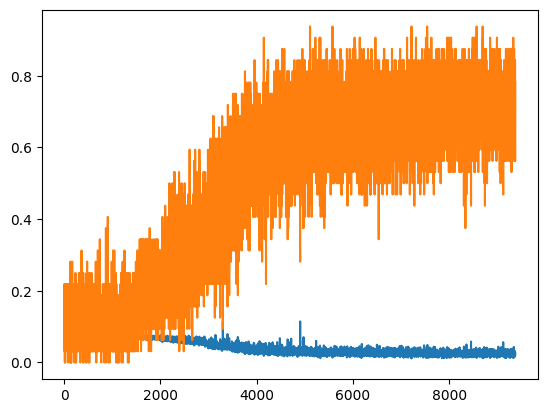

In [10]:
plt.plot(losses)
plt.plot(accs)

In [11]:
model.eval()
score = 0
for x, y in dataloader_test:
    score += (model(x.to(device)).argmax(dim=1).detach().cpu()==y).sum()
score

tensor(7370)

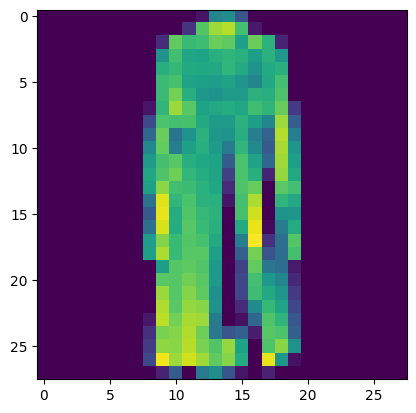

In [12]:
from random import randint

i = randint(0, 60_000)

sample = dataset_train.data[i].type(torch.float).to(device)
plt.imshow(dataset_train.data[i])
out = model(sample.unsqueeze(dim=0).unsqueeze(dim=0))
